In [230]:
import os
import time
import numpy as np
import torch
import tensorflow as tf
import torch.nn.functional as F
from matplotlib import pyplot as plt

In [231]:
# Select device (cpu, cuda, mps)

# For NVIDIA GPUs
has_gpu = torch.cuda.is_available()

# For Apple Silicon (M1/M2)
has_mps = torch.backends.mps.is_built()  # Updated this line
# And updated this line
device = "mps" if torch.backends.mps.is_built() \
    else "cuda" if torch.cuda.is_available() else "cpu"

print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


In [232]:
# List available GPUs visible to TensorFlow
gpus = tf.config.experimental.list_physical_devices('GPU')

# Loop through each GPU and configure TensorFlow
# to allocate memory as needed rather than upfront
for gpu in gpus:
    # This prevents TensorFlow from allocating all the GPU memory at once
    # which allows for training multiple models or running multiple experiments in parallel.
    tf.config.experimental.set_memory_growth(gpu, True)


In [233]:
# Import the OpenCV library.
# OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library.
# It contains numerous functions for image and video processing.
import cv2

# Import the Image class from the PIL (Python Imaging Library) module.
# PIL, known as Pillow in its current version, is a library for opening, manipulating,
# and saving many different image file formats.
from PIL import Image

# Define the directory path that contains the dataset.
# This is the root folder where your data is stored. The 'data' directory
# is expected to have subdirectories for each class of data, or it might
# contain image files directly if it's for inference or further processing.
data_dir = 'data'

# Use the os (operating system) library's listdir method to list all files and directories within 'data_dir'.
# This function call will return a list containing the names of the entries in the directory given by 'data_dir'.
# It's often used to quickly check the contents of a directory, for example, to verify data organization
# before loading it for machine learning or other processing tasks.
contents = os.listdir(data_dir)

# Create a dictionary mapping the file format names to their common file extensions.
# This is useful when you need to handle different image file formats and you want to ensure
# consistency in file extension usage. For example, 'JPEG' files are commonly saved with the '.jpg' extension.
format_to_ext = {'JPEG': 'JPG', 'TIFF': 'TIF', 'GIF': 'GIF', 'BMP': 'BMP'}

# Define a set of valid image file extensions.
# Sets are useful for membership testing, making it easy to check if a given file extension
# is part of the set of allowed image formats. This helps in filtering image files from other types of files.
image_exts = {'JPG', 'TIF', 'GIF', 'BMP'}

# The 'image_exts' set contains the file extensions that are recognized as valid image formats.
# It is used in the context of file processing to ensure that only files with these extensions
# are processed as images. You can refer to this set when filtering a list of files to
# include only image files or when validating the file types being read or saved.
image_exts

{'BMP', 'GIF', 'JPG', 'TIF'}

In [234]:
# Iterate through each entry in the 'data_dir' directory, which are expected to be subdirectories representing image classes.
for image_class in contents:
    # Construct the path to the subdirectory for the current class using 'os.path.join'.
    # Then, iterate through each image file in the class subdirectory.
    class_path = os.path.join(data_dir, image_class)
    for image in os.listdir(class_path):
        # Print the filename of each image.
        # This can be used to verify the presence and names of image files within each class directory,
        # ensuring that the data is organized as expected.
        print(image)

hat-with-tone-in-tone-brim-edge-ribbon-and-contrasting-dark-hat-band-588x588.jpg
hats-fedora_banner_1_grande.jpg
the-voice-25-chance-the-rapper.jpg
61ahd87GteL._AC_UY1000_.jpg
w2000_a3-4_q602.jpg
yoyo-cao-wears-black-beanie-dark-blue-denim-jacket-jeans-news-photo-1670792289.jpg
357126_14028_XL.jpg
XL_p0182431431.jpg
703.176621_60063_10_HR.jpg
177000510_max.jpg
JCG_190614_1180_Final_2048x.jpg
63b87350-afba-4ccc-85e4-9ad075bc1097_b89a5416-93e6-4869-83d6-84a699a5fb2e.jpg
1015308.jpg
styleswithace_2000x.jpg
erjha04162_roxyl_bpg0_frt1.jpg
w2000_a3-4_q603.jpg
703.176621_80013_10_HR.jpg
1663187140645.jpeg
COAL_FW23-2244.jpg
tyler2.jpg
images33.jpg
Summit-Sangria-LeatherFelt-Fedora-AmericanHatMakers-Male-STUD.jpg
UUH300TW42807017TU_02.jpg
1200px-A_fedora_hat2C_made_by_Borsalino.jpg
358002_27960_XL.jpg
beanie-black-speckled-beanie-3_f8b236b8-04ed-4b87-983d-6488e7e8da7a_1024x1024.jpg
easy-crochet-hat-pattern-free-13.jpg
a-gommata-b31300ev-00022F15522Fsmall-2-815814e6-4b0a-4f70-8b33-24849022a00c.

In [235]:
# Load an image using OpenCV's imread function. The image is located in the 'Dresses' subdirectory within the 'data' directory.
# The specific image being loaded is 'images10.jpg'. The imread function reads the image file and converts it into a multi-dimensional
# numpy array representing the pixel values of the image. If the image path is incorrect or the image file is not accessible,
# imread will return None. This makes it essential to check if 'img' is None before proceeding with further image processing.
img = cv2.imread(os.path.join('data', 'Dresses', 'images10.jpg'))

# Access the shape attribute of the 'img' numpy array to retrieve the dimensions of the image.
# 'img.shape' returns a tuple that contains the dimensions of the array representing the image.
# Typically, for a color image, this will be in the format (height, width, channels),
# where 'channels' represents the depth of the image (e.g., 3 for an RGB image).
# For grayscale images, the tuple will be (height, width).
# This is often used to check the size of the image for further processing requirements or to ensure
# that the image meets the input size requirements of a model or algorithm.
img.shape

(275, 183, 3)

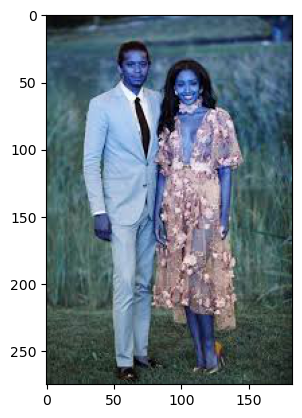

In [236]:
# Display the image using Matplotlib's imshow function. The function plt.imshow(img) is used to display an image
# or array as a colored image if 'img' is a 3-channel image (typically RGB), or as a grayscale image if 'img' is 2D.
# This is commonly used in image processing and machine learning tasks to visually inspect images as part of debugging,
# to ensure that the images have been loaded correctly, and to verify that any preprocessing steps such as color conversions
# have been performed properly.
plt.imshow(img)

In [237]:
# Loop through each entry in the directory specified by 'data_dir'. Each entry is assumed to be a directory
# representing an image class.
for image_class in os.listdir(data_dir):
    # For each class, loop through each file in the directory.
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Construct the full path to the image file.
        image_path = os.path.join(data_dir, image_class, image)
        
        try:
            # Attempt to open the image using the PIL Image library. Using 'with' ensures resources are managed properly,
            # and the file is closed after the block is exited, even if an error occurs.
            with Image.open(image_path) as img:
                # Retrieve the format of the image, such as 'JPEG', 'PNG', etc.
                image_format = img.format
                
                # Check if the image format is in the set of acceptable extensions. 'format_to_ext' maps formats
                # to their respective common file extensions. If the format's mapped extension is not in 'image_exts',
                # it indicates the file is not of an accepted type.
                if format_to_ext.get(image_format, image_format) not in image_exts:
                    # If the format is not accepted, print a message and remove the image file.
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
                    
        except Exception as e:
            # If an error occurs (e.g., the file is corrupted or unreadable), print the error and the file path.
            print('Issue with image {}: {}'.format(image_path, e))
            # Optionally remove the image if there are issues opening it, suggesting the file might be corrupted.
            os.remove(image_path)

In [238]:
# Import the to_categorical function from TensorFlow Keras utilities, used for one-hot encoding labels.
from tensorflow.keras.utils import to_categorical

# Load images from the directory 'data'. This function automatically reads images from subdirectories,
# and each subdirectory name is taken as a class label.
data = tf.keras.utils.image_dataset_from_directory(
    'data',  # Path to the root directory to scan. It should contain one subdirectory per class.
    image_size=(256, 256),  # Resize images to 256x256 pixels. It's important for CNN input layer consistency.
    batch_size=32,  # Number of images to return in each batch.
    label_mode='categorical'  # Specifies that labels should be returned in a one-hot encoded format.
)

# Retrieve the class names automatically extracted from the directory structure. `class_names` are
# derived from the subfolder names in 'data' and are sorted in alphanumeric order.
class_names = data.class_names
print("Classes:", class_names)

# Create a dictionary that maps class names to their respective indices.
# This is helpful for reference and for use in functions where class names need to be converted to indices.
class_to_index = dict((name, index) for index, name in enumerate(class_names))
print("Class to index mapping:", class_to_index)

Found 1065 files belonging to 5 classes.
Classes: ['.ipynb_checkpoints', 'Dresses', 'Hats', 'Pants', 'Shirts']
Class to index mapping: {'.ipynb_checkpoints': 0, 'Dresses': 1, 'Hats': 2, 'Pants': 3, 'Shirts': 4}


In [239]:
# Convert the 'data' dataset, which is a TensorFlow Dataset object, into an iterator that returns numpy arrays.
# This allows for easy iteration over the dataset, where each element in the iteration will be a tuple 
# containing a batch of images and their corresponding labels in numpy array format.
# This is particularly useful for debugging or when numpy operations are needed directly on the dataset,
# as TensorFlow datasets typically yield tensors.
data_iterator = data.as_numpy_iterator()

# Retrieve the next batch of data from the 'data_iterator'. 
# The 'batch' variable will hold a tuple containing two elements:
# the first element is a numpy array of images, and the second element is a numpy array
# of the corresponding one-hot encoded labels for those images.
# This method is used to iterate through the dataset one batch at a time.
# Using '.next()' is useful for processing or inspecting data in smaller, manageable chunks,
# especially when dealing with large datasets that may not fit entirely in memory.
batch = data_iterator.next()

# 'batch' contains a single batch of data retrieved from the 'data_iterator'.
# It is a tuple where:
# - The first element of the tuple, batch[0], contains a numpy array of images. Each image in this array
#   is formatted according to the specifications of the 'image_dataset_from_directory' function, likely
#   with dimensions (256, 256, 3) representing the height, width, and color channels.
# - The second element of the tuple, batch[1], contains a numpy array of one-hot encoded labels corresponding
#   to the images. The shape of this array depends on the number of classes specified in the dataset.
# This format is especially useful for directly processing image data and labels for tasks such as
# feeding them into non-TensorFlow machine learning models, performing custom analysis, or visual inspections.
batch

2024-04-21 17:26:06.639586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1065]
	 [[{{node Placeholder/_4}}]]
2024-04-21 17:26:06.640051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1065]
	 [[{{node Placeholder/_4}}]]


(array([[[[209.71875 , 216.5625  , 213.79346 ],
          [210.4895  , 216.82568 , 213.27612 ],
          [210.81104 , 216.24854 , 214.60938 ],
          ...,
          [202.90552 , 204.09448 , 198.      ],
          [201.      , 204.      , 197.      ],
          [201.26831 , 204.7561  , 197.7561  ]],
 
         [[210.06787 , 216.53662 , 212.42188 ],
          [210.87549 , 217.39844 , 212.64014 ],
          [212.29907 , 216.29907 , 215.61157 ],
          ...,
          [203.22437 , 204.89624 , 198.5603  ],
          [201.      , 204.      , 197.      ],
          [199.28638 , 204.02075 , 197.02075 ]],
 
         [[211.64282 , 214.1875  , 215.6726  ],
          [210.79688 , 215.19531 , 213.      ],
          [211.60571 , 217.06616 , 215.60889 ],
          ...,
          [202.92188 , 204.59375 , 198.25781 ],
          [202.20312 , 204.40625 , 197.80469 ],
          [202.21948 , 203.4851  , 197.3523  ]],
 
         ...,
 
         [[198.99927 , 206.83032 , 202.4773  ],
          [200.169

In [240]:
# 'batch[0].shape' accesses the shape attribute of the first element of the 'batch' tuple, which contains the numpy array of images.
# This will output the dimensions of the array, typically given as (batch_size, height, width, channels).
# For instance, if the batch size is set to 32 and images are resized to 256x256 pixels with 3 color channels (RGB),
# the shape would be (32, 256, 256, 3). This information is crucial for understanding the data structure,
# ensuring that it meets the input requirements of models, and for debugging purposes to verify that the images
# are being loaded and processed correctly.
batch[0].shape # (32 images, 256X256, 3 channels)

(32, 256, 256, 3)

In [241]:
# 'batch[1]' refers to the second element of the 'batch' tuple, which contains the numpy array of one-hot encoded labels for the images.
# These labels correspond directly to the images in 'batch[0]' and represent the classification targets in a format suitable for training.
# Each label in this array is a one-hot encoded vector, where the length of the vector equals the number of classes in the dataset.
# For instance, if there are 4 classes, each label vector will have 4 elements with one element set to 1 (indicating the class) and the rest set to 0.
# This structure is crucial for categorical classification tasks in machine learning, allowing the model to train against clearly defined target outputs.
batch[1] # 0 represnents images and 1 represents batch labels (1 = Dresses, 2 = Hats, etc.)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

/Users/paigemalcolm/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


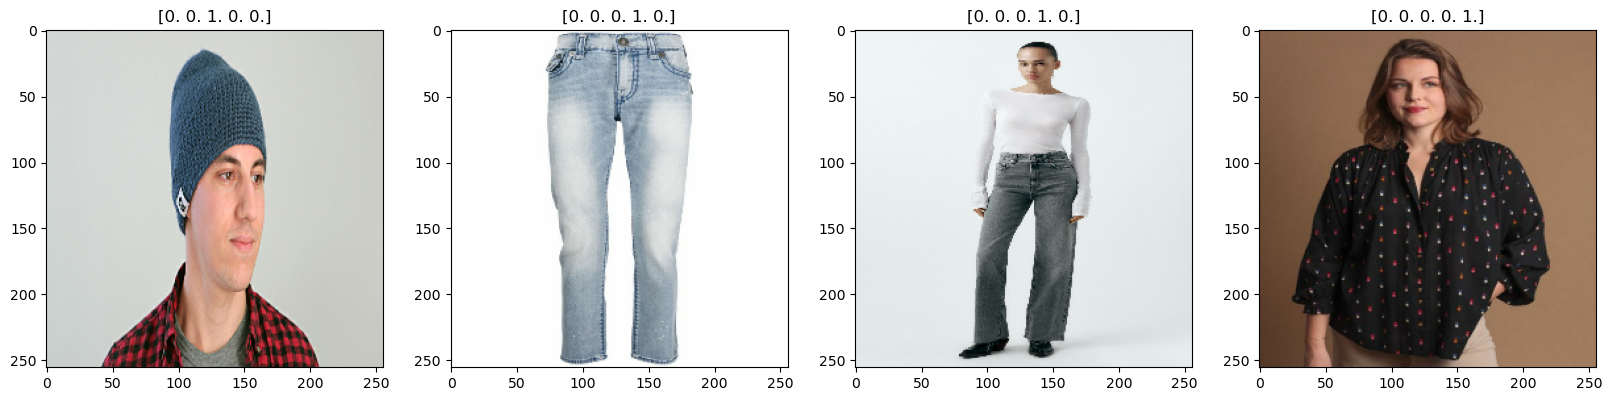

In [242]:
# class 1, = dresses, class 2 = hats, class 3 = pants, class 4 = shirts
# Define a mapping of class indices to descriptive names for better visualization.
# Class 1 corresponds to dresses, class 2 to hats, class 3 to pants, and class 4 to shirts.
# Create a figure with 4 subplots arranged in one row (ncols=4), each subplot will display an image.
# The figsize parameter sets the figure size to 20x20 inches, providing enough space for each subplot.
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Iterate through the first four images in the batch (batch[0][:4]).
# 'enumerate' provides a counter 'idx' to access the current position in the batch and use it to reference the subplot.
for idx, img in enumerate(batch[0][:4]):
    # Display each image in one of the subplots.
    # Convert the pixel values of the images to integers for correct visualization, as matplotlib expects ints for RGB values.
    ax[idx].imshow(img.astype(int))
    # Set the title of each subplot to the corresponding label from batch[1][idx].
    # The label is expected to be a one-hot encoded vector, and here it is directly shown as the title.
    # Note: To show class names instead of one-hot vectors, a conversion or lookup would be needed here.
    ax[idx].title.set_text(batch[1][idx])

### Pre-Processing

In [243]:
# scale data (transformation)
# Apply a transformation to each element in the 'data' dataset using the 'map' method. 
# The lambda function takes two arguments: x and y, corresponding to the image data and labels respectively.
# The transformation normalizes the image data by scaling pixel values to the range [0, 1].
# This is achieved by dividing each pixel value by 255 (since pixel values range from 0 to 255).
# The labels 'y' are passed through unchanged.
# Normalizing the image data is a common preprocessing step in machine learning to help the model train more efficiently.
scaled = data.map(lambda x, y: (x / 255, y))

# Create an iterator from the 'data' dataset using the 'as_numpy_iterator' method.
# This converts the dataset into an iterator that will yield each batch as a tuple of numpy arrays.
# The images and labels that were originally in the form of TensorFlow tensors are converted to numpy arrays.
# This is useful for operations that require numpy arrays directly, or for easy integration with libraries
# that operate on numpy arrays, or simply for debugging and visual inspection of data.
scaled_iterator = data.as_numpy_iterator()

# Retrieve the next batch from the 'scaled_iterator'. The `next()` function moves the iterator forward
# and returns the next item. This will return a tuple where the first element is a numpy array of images
# that have been processed (e.g., scaled) as specified in the dataset operations, and the second element
# is a numpy array of the corresponding labels. This is typically used to process or inspect a single batch
# of data from the dataset.
next_element = scaled_iterator.next()

print(next_element) # shows us how our data changes after scaling

(array([[[[236.25     , 217.15234  , 175.84766  ],
         [221.84375  , 226.77734  , 144.5586   ],
         [225.1211   , 212.41406  , 138.1836   ],
         ...,
         [252.       , 252.       , 252.       ],
         [252.       , 252.       , 252.       ],
         [252.       , 252.       , 252.       ]],

        [[225.3086   , 209.48438  , 178.57031  ],
         [218.92969  , 213.04688  , 142.46094  ],
         [245.67578  , 216.42188  , 160.75781  ],
         ...,
         [251.       , 251.       , 251.       ],
         [252.       , 252.       , 252.       ],
         [252.       , 252.       , 252.       ]],

        [[161.33594  , 163.4961   ,  88.578125 ],
         [195.51562  , 189.13281  ,  91.28516  ],
         [181.4375   , 167.33984  ,  85.171875 ],
         ...,
         [252.       , 252.       , 252.       ],
         [252.       , 252.       , 252.       ],
         [252.       , 252.       , 252.       ]],

        ...,

        [[238.51562  , 192.94531  , 1

In [244]:
# check how many batches of data we have
len(data)

34

In [245]:
# split data into testing, validation, and training
train_size = int(len(data)*.7) # 23 batches
val_size = int(len(data)*.1) + 1 # 4 batches
test_size = int(len(data)*.2) # 7 batches

# utilize tesnorflow take and skip functions to establish training, validation, and testing partitions
train = data.take(train_size)
val = data.skip(train_size).take(val_size) # skip the data that was allocated to training and take the data allocated to validation
test = data.skip(train_size+val_size).take(test_size) # repeat for test data

len(train) # length of each partition

23

## Build Deep Learning Model

In [246]:
# Build deep learning model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# Load ResNet50 pretrained on ImageNet, without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(256, 256, 3)))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create the top layers for your new classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
x = Dense(256, activation='relu')(x)  # a new FC layer, not frozen
predictions = Dense(5, activation='softmax')(x) # new softmax layer

# Define the entire model
model = Model(inputs=base_model.input, outputs=predictions)

# Define an exponential decay learning rate scheduler
initial_learning_rate = 0.001  # Starting learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

# Create an optimizer with the learning rate scheduler
optimizer = Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# The `model.summary()` method displays a concise summary of the model, including:
# - The layers of the model, showing the types of the layers and their names.
# - The output shape of each layer, which details the dimensions that the output of each layer will have.
# - The number of parameters in each layer, both trainable and non-trainable. This includes weights and biases.
# This summary is extremely useful for verifying the architecture of your model, ensuring that layer configurations
# are as expected, and for understanding the parameter count which can affect both model performance and complexity.
# It also helps in debugging issues related to model input and output dimensions.
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

### Train

In [247]:
# Define the directory where the TensorBoard logs will be stored. 'logs' is typically a folder
# within the project directory that will contain subfolders for each run, organizing the training
# process metadata, which includes losses, metrics, and potentially other model-related information.
logdir = 'logs'

# Create a TensorBoard callback that is configured to write logs to the specified directory.
# TensorBoard is a visualization tool provided with TensorFlow that allows you to view metrics like loss and accuracy,
# visualize the model graph, and other statistical data about the model during and after training.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Fit the model to the training data. Here, 'model.fit' is called with the training dataset 'train',
# the number of epochs set to 30, and the validation dataset 'val'. The TensorBoard callback is included
# in the list of callbacks, which enables logging of training and validation metrics to the specified log directory.
# This allows you to monitor the model's performance and training progress using TensorBoard.
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30


2024-04-21 17:26:21.077913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1065]
	 [[{{node Placeholder/_4}}]]
2024-04-21 17:26:21.078153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1065]
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - ETA: 0s - loss: 0.7104 - accuracy: 0.7418

2024-04-21 17:27:40.997975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1065]
	 [[{{node Placeholder/_4}}]]
2024-04-21 17:27:40.998456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1065]
	 [[{{node Placeholder/_4}}]]


23/23 [==============================] - 104s 4s/step - loss: 0.7104 - accuracy: 0.7418 - val_loss: 0.5123 - val_accuracy: 0.7969
Epoch 2/30
23/23 [==============================] - 104s 4s/step - loss: 0.2290 - accuracy: 0.9130 - val_loss: 0.1421 - val_accuracy: 0.9375
Epoch 3/30
23/23 [==============================] - 105s 4s/step - loss: 0.1204 - accuracy: 0.9552 - val_loss: 0.2181 - val_accuracy: 0.9297
Epoch 4/30
23/23 [==============================] - 105s 4s/step - loss: 0.1010 - accuracy: 0.9701 - val_loss: 0.2316 - val_accuracy: 0.9531
Epoch 5/30
23/23 [==============================] - 103s 4s/step - loss: 0.0686 - accuracy: 0.9796 - val_loss: 0.2485 - val_accuracy: 0.9375
Epoch 6/30
23/23 [==============================] - 103s 4s/step - loss: 0.0489 - accuracy: 0.9905 - val_loss: 0.1721 - val_accuracy: 0.9375
Epoch 7/30
23/23 [==============================] - 103s 4s/step - loss: 0.0326 - accuracy: 0.9932 - val_loss: 0.0996 - val_accuracy: 0.9688
Epoch 8/30
23/23 [======

2024-04-21 19:15:01.046699: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 181 of 256
2024-04-21 19:15:01.049287: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 182 of 256
2024-04-21 19:15:01.049295: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 183 of 256
2024-04-21 19:15:01.049299: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 184 of 256
2024-04-21 19:15:01.049302: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 185 of 256
2024-04-21 19:15:01.049306: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 186 of 256
2024-04-21 19:15:01.177930: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer 

23/23 [==============================] - 6068s 276s/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.2088 - val_accuracy: 0.9531
Epoch 12/30
23/23 [==============================] - 113s 5s/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.1639 - val_accuracy: 0.9531
Epoch 13/30
23/23 [==============================] - 100s 4s/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.1945 - val_accuracy: 0.9375
Epoch 14/30
23/23 [==============================] - 101s 4s/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.1783 - val_accuracy: 0.9531
Epoch 15/30
23/23 [==============================] - 102s 4s/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1666 - val_accuracy: 0.9609
Epoch 16/30
23/23 [==============================] - 103s 4s/step - loss: 0.0093 - accuracy: 0.9986 - val_loss: 0.1419 - val_accuracy: 0.9688
Epoch 17/30
23/23 [==============================] - 101s 4s/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 0.9688
Epoch 18/30
23/

In [250]:
# 'hist.history' contains a dictionary holding a record of the training and validation loss values
# and metrics values at successive epochs, as well as other metrics if they have been specified.
# This dictionary is typically used to plot training and validation curves, helping in the assessment
# of how quickly and effectively the model is learning, diagnosing issues with the training such as
# overfitting or underfitting, and determining whether the training could benefit from more epochs
# or requires adjustments in learning rate or other hyperparameters.
#
# The keys of the dictionary are the names of the metrics monitored during training and validation,
# such as 'loss', 'accuracy', 'val_loss', and 'val_accuracy'. The values are lists containing the 
# metric values for each epoch, allowing for easy plotting of these metrics over the training process.
hist.history

{'loss': [0.7103687524795532,
  0.22896157205104828,
  0.12041642516851425,
  0.10096224397420883,
  0.06856479495763779,
  0.04892965406179428,
  0.03257604315876961,
  0.028119763359427452,
  0.02071615494787693,
  0.018180176615715027,
  0.013457209803164005,
  0.0099096754565835,
  0.008291400969028473,
  0.006630293559283018,
  0.006774718873202801,
  0.0092528210952878,
  0.006681761704385281,
  0.0038623984437435865,
  0.0034444835036993027,
  0.004830752965062857,
  0.004675567615777254,
  0.002631677780300379,
  0.0022585210390388966,
  0.0020607998594641685,
  0.0017376260366290808,
  0.0016653516795486212,
  0.001556471106596291,
  0.0014540784759446979,
  0.001609072438441217,
  0.0018901104340329766],
 'accuracy': [0.741847813129425,
  0.9130434989929199,
  0.9551630616188049,
  0.970108687877655,
  0.979619562625885,
  0.99048912525177,
  0.9932065010070801,
  0.9959239363670349,
  0.9972826242446899,
  0.9972826242446899,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9986413121

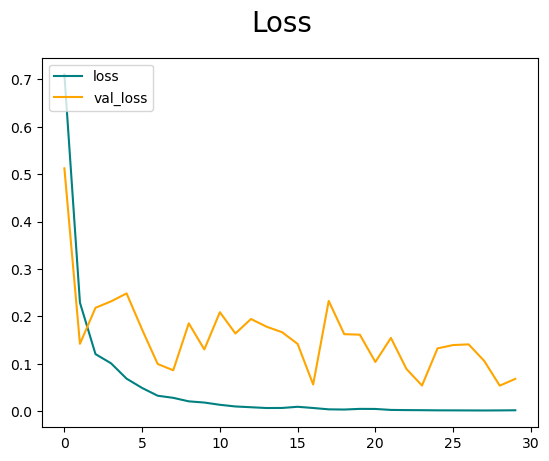

In [251]:
# Plot performance: This block of code is designed to visualize the training and validation loss over the epochs.
# A new figure is created with `plt.figure()` which serves as a container for the plot.

fig = plt.figure()

# The training loss ('loss') is plotted in teal. This line graph represents how the model's loss decreased
# as it learned over each epoch during the training phase. A decreasing trend in this plot is typically indicative
# of good learning progress.
plt.plot(hist.history['loss'], color='teal', label='loss')

# The validation loss ('val_loss') is plotted in orange. This line graph shows the loss calculated on a separate
# validation dataset that is not used for training but to monitor the model's performance to avoid overfitting.
# Ideally, both the training loss and validation loss should decrease and follow similar trends.
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

# 'fig.suptitle' sets the title of the figure with a font size of 20. 'Loss' is used here to denote that
# the plot is specifically showing how the loss metric has changed over the course of training.
fig.suptitle('Loss', fontsize=20)

# 'plt.legend' places a legend on the plot in the "upper left" corner. This legend distinguishes between
# the plotted lines, labeling them according to their 'label' parameter so viewers can identify which line
# corresponds to training loss and which to validation loss.
plt.legend(loc="upper left")

# Finally, `plt.show()` displays the plot. Without this call, the plot would not be visible (in some environments,
# like certain Python IDEs or when running Python scripts from the command line).
plt.show()

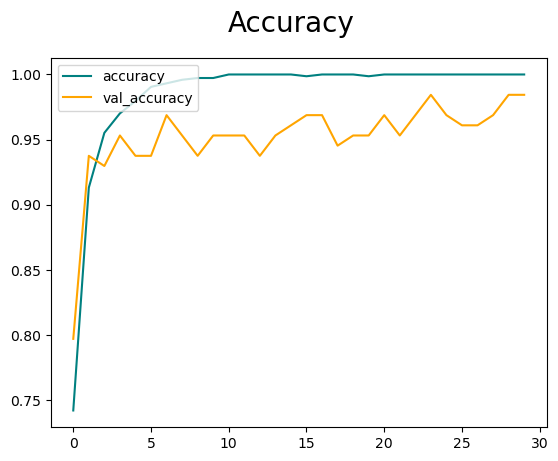

In [252]:
# Plot performance: This code block creates a visualization for observing the training and validation accuracy over training epochs.
# It helps in assessing the model's performance, particularly how well it generalizes to new, unseen data.

# Create a new figure object for the plot. This will be the container where the accuracy curves are drawn.
fig = plt.figure()

# Plot the training accuracy. 'hist.history['accuracy']' contains the accuracy metrics recorded during training at each epoch.
# It is plotted in teal color to differentiate it from the validation accuracy. The label 'accuracy' will be used in the legend.
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')

# Plot the validation accuracy. Similar to training accuracy, 'hist.history['val_accuracy']' contains the accuracy metrics
# but evaluated on the validation dataset. This line is plotted in orange color to distinguish it from the training accuracy.
# The label 'val_accuracy' will be used in the legend.
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

# Set the title of the figure using 'fig.suptitle'. 'Accuracy' indicates that this plot is focused on the accuracy metric.
# The fontsize of 20 makes the title prominently visible.
fig.suptitle('Accuracy', fontsize=20)

# Add a legend to the plot in the "upper left" corner. This legend helps in identifying which curve represents training accuracy
# and which represents validation accuracy, essential for interpreting the plot correctly.
plt.legend(loc="upper left")

# Display the plot using `plt.show()`. This function call renders the plot and shows it to the user. Without this,
# the plot will not appear in some environments, such as scripts run outside of Jupyter notebooks.
plt.show()

### Evaluate Performance

In [253]:
# Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
# Instantiate the Precision metric. This metric computes the proportion of positive identifications (i.e., the number of
# true positive predictions) that were actually correct. Precision is a key metric in scenarios where the cost of a false
# positive is high. It is especially important in binary classification problems to understand the accuracy of the positive
# predictions.
pre = Precision()

# Instantiate the Recall metric. This metric computes the proportion of actual positives that were identified correctly.
# Recall (also known as sensitivity) is particularly critical in medical scenarios or other contexts where missing a positive
# instance (a false negative) is significantly worse than getting a false positive. Recall gives us a measure of the model's
# ability to find all the relevant cases within a dataset.
re = Recall()

# Instantiate the BinaryAccuracy metric. This metric calculates how often predictions match binary labels. It's used in binary
# classification tasks to measure the percentage of correct predictions (both true positives and true negatives) among the total
# number of cases examined. It provides a general idea of how well the model is performing across both positive and negative classes.
acc = BinaryAccuracy()

len(test)

6

In [254]:
# Iterate over each batch of the test dataset using an iterator that converts the data to numpy arrays.
# This is necessary because TensorFlow models consume numpy arrays for predictions when not using tf.data pipelines.
for batch in test.as_numpy_iterator():
    # Unpack the batch. X contains the features (input images or data) and y contains the true labels.
    X, y = batch
    
    # Generate predictions (yhat) for the input features (X) using the model. The predict method returns the likelihoods
    # or class probabilities for each instance in the batch, depending on the final layer configuration of the model.
    yhat = model.predict(X)
    
    # Update the Precision metric state with the true labels and the predicted labels.
    # This accumulates the true positives and predicted positives needed to compute the precision score.
    pre.update_state(y, yhat)
    
    # Update the Recall metric state with the true labels and the predicted labels.
    # This counts the true positives and possible positives (actual condition positives) necessary for recall computation.
    re.update_state(y, yhat)
    
    # Update the BinaryAccuracy metric state with the true labels and the predicted labels.
    # This keeps track of the correctly classified instances to compute the overall accuracy of the model.
    acc.update_state(y, yhat)

2024-04-21 19:57:56.892193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1065]
	 [[{{node Placeholder/_0}}]]
2024-04-21 19:57:56.892630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1065]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 3s 3s/step


In [260]:
# Print the final computed metrics after processing all batches.
# The `result()` method on each metric object (acc, pre, re) retrieves the final value for the metric,
# which has been accumulated over all the batches processed in the loop.
# `numpy()` is called to convert the result from a TensorFlow tensor to a native Python/NumPy data type for easy readability.
# This line outputs the accuracy, precision, and recall values, providing a concise summary of the model's performance
# on the test dataset. These metrics are essential for understanding how well the model has learned to classify the input data
# and are particularly important for gauging both the overall effectiveness (accuracy) and the balance between sensitivity 
# (recall) and specificity (precision).
print(f'Accuracy: {acc.result().numpy()}, Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}')

Accuracy: 0.981249988079071, Precision: 0.953125, Recall: 0.953125


6/6 [==============================] - 33s 4s/step


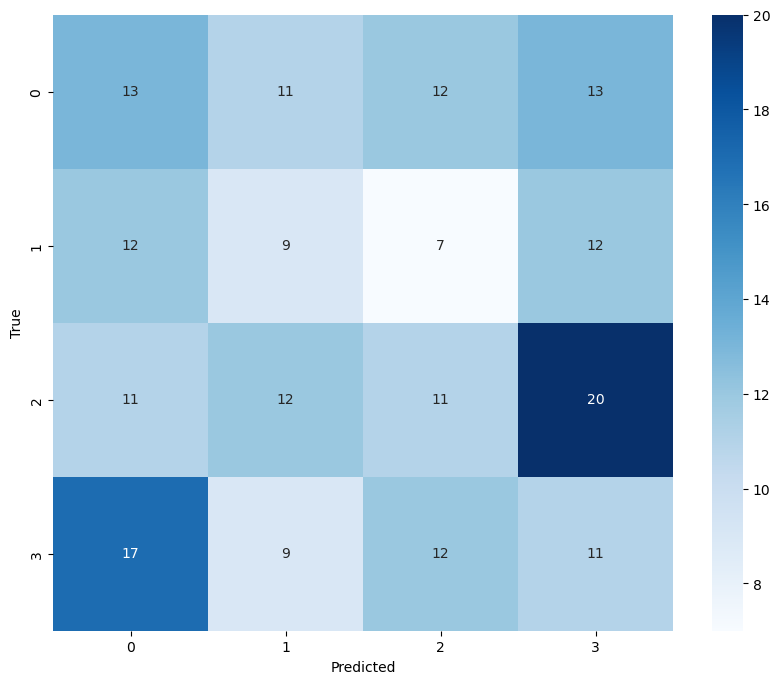

In [261]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'model' is your actual Keras model and 'test_size' is a dataset or generator
# that yields (input_data, labels)

# Step 1: Get the true labels from the test set
true_labels = np.concatenate([y for x, y in test], axis=0)
true_labels = np.argmax(true_labels, axis=1)  # Only if labels are one-hot encoded

# Step 2: Get the predicted labels
predicted_labels = model.predict(test)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Step 3: Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


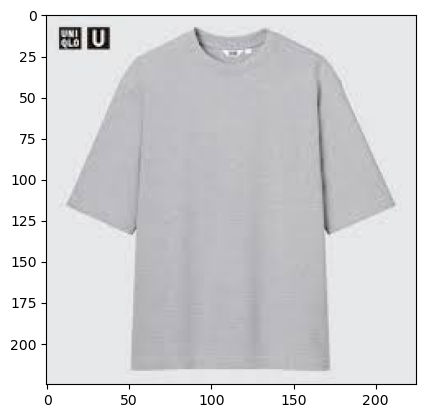

In [299]:
# Load the image
img_path = 'imageclassification/random4.jpg'  # Provide the full path to the image file
img = cv2.imread(img_path)

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.show()

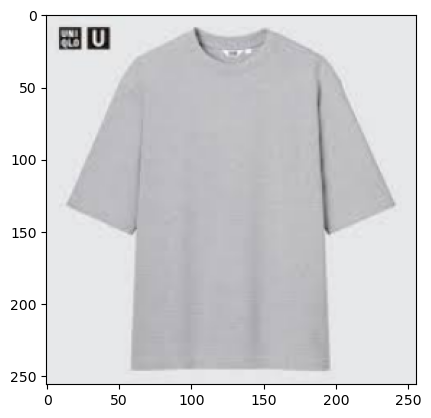

In [300]:
# Convert the image to a TensorFlow tensor
img_tensor = tf.convert_to_tensor(img_rgb, dtype=tf.float32)

# Resize the image
resize = tf.image.resize(img_tensor, (256, 256))

# Convert the resized image to a numpy array and ensure the data type is integer for display
plt.imshow(resize.numpy().astype(int))
plt.show()

In [301]:
# Use the model to predict the class of a resized image.
# The 'resize' variable contains an image that has been resized to match the model's expected input size.
# The image pixel values are scaled by dividing by 255, normalizing them to the range [0, 1], which is a common
# practice for neural network inputs to aid in model convergence and performance.
# 'np.expand_dims(resize / 255, 0)' adds a new dimension at index 0 to the array, converting it from shape
# (height, width, channels) to (1, height, width, channels). This is necessary because the model's 'predict' method
# expects a batch of images to process, even if there's only one image to predict.
# This operation effectively makes the image array a batch with one image.
yhat = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 83ms/step


In [302]:
# 'yhat' contains the output from the model's prediction method. In the context of a classification task,
# 'yhat' typically holds the predicted probabilities or logits for each class, depending on the model's final layer.
# If the model ends with a softmax layer, 'yhat' would contain the probabilities for each class,
# representing the model's confidence in each class for the given input.
# This array can be used to determine the most likely class by finding the index of the highest probability.
# It is essential for evaluating the model's decision and further processing like calculating metrics or making decisions
# based on the predicted outcomes.
yhat

array([[4.6144596e-05, 2.1617589e-04, 2.3944607e-01, 7.8933626e-02,
        6.8135804e-01]], dtype=float32)

In [303]:
# Print the shape of the 'yhat' array to the console. This shape gives important information about the dimensions
# of the output from the model's prediction method. For instance, if the model is used for classification and predicts
# multiple samples at once, 'yhat.shape' might output a shape like (n, k) where 'n' is the number of samples predicted
# in the batch and 'k' is the number of classes. This helps verify that the model is outputting predictions in the
# expected format and is particularly useful for debugging the output dimensions of the model, ensuring they align
# with the expected structure for further analysis or processing steps.
print(yhat.shape)

(1, 5)


In [304]:
# Get the index of the largest value (most confident prediction)
predicted_class_index = np.argmax(yhat)

# Get the value of the highest probability (confidence of the prediction)
prediction_confidence = np.max(yhat)

# Print out the information
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Prediction Confidence: {prediction_confidence:.2f}")

# If you want to work with the full set of probabilities:
predicted_probabilities = yhat
print(f"Predicted Probabilities: {predicted_probabilities}")

Predicted Class Index: 4
Prediction Confidence: 0.68
Predicted Probabilities: [[4.6144596e-05 2.1617589e-04 2.3944607e-01 7.8933626e-02 6.8135804e-01]]


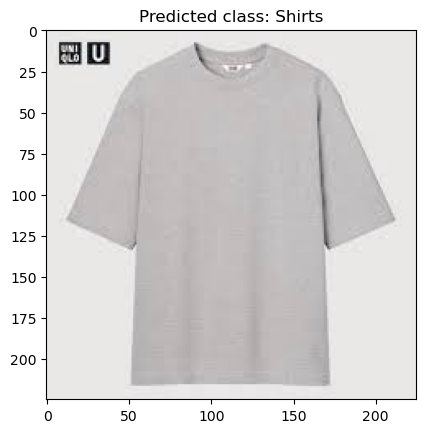

In [305]:
# Dictionary mapping class indices to class names
class_names = {
    1: 'Dresses',
    2: 'Hats',
    3: 'Pants',
    4: 'Shirts'  # Adjusted index for Shirts from 'else' to '4'
}

# Use the dictionary to get the class name based on the predicted index
predicted_class_name = class_names.get(predicted_class_index, 'Unknown Class')

# Display the image and the predicted class
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_name}')
plt.show()